# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Extract weather details
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except KeyError:
        # City not found, log the error and skip
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | aykhal
Processing Record 4 of Set 1 | lhasa
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | hovd
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | kyneton
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,87,22,8.05,NZ,1728513667
1,adamstown,-25.0660,-130.1015,20.47,76,71,8.12,PN,1728513669
2,aykhal,66.0000,111.5000,-12.18,100,98,1.72,RU,1728513670
3,lhasa,29.6500,91.1000,7.28,72,10,2.13,CN,1728513671
4,ilulissat,69.2167,-51.1000,1.01,93,100,0.00,GL,1728513498


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,87,22,8.05,NZ,1728513667
1,adamstown,-25.0660,-130.1015,20.47,76,71,8.12,PN,1728513669
2,aykhal,66.0000,111.5000,-12.18,100,98,1.72,RU,1728513670
3,lhasa,29.6500,91.1000,7.28,72,10,2.13,CN,1728513671
4,ilulissat,69.2167,-51.1000,1.01,93,100,0.00,GL,1728513498


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

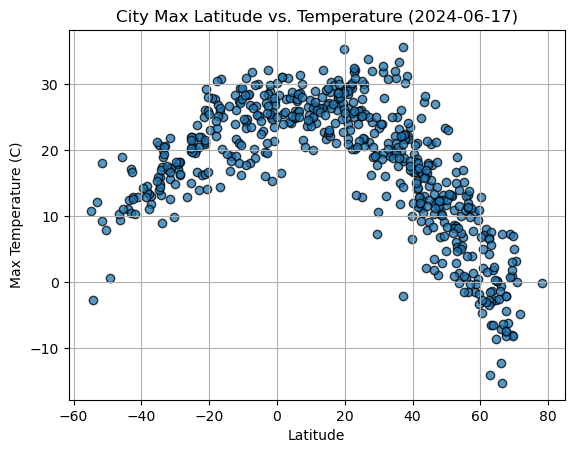

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

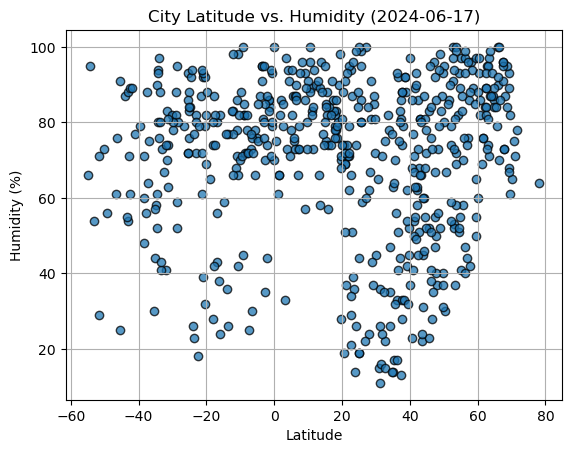

In [21]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

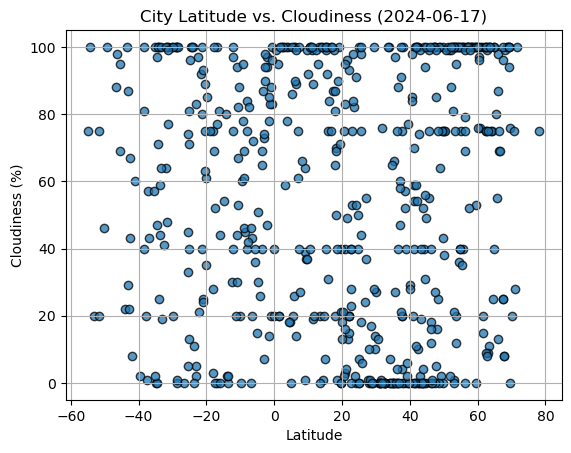

In [22]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

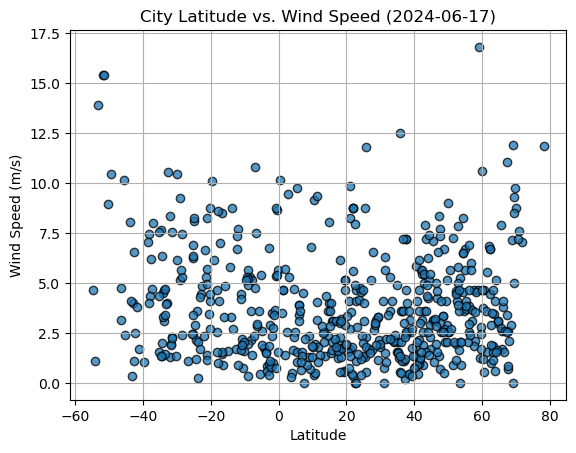

In [23]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # Get regression values
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot scatter plot and regression line
    plt.scatter(x, y, edgecolor="black", alpha=0.75)
    plt.plot(x, regress_values, color="red")
    
    # Add labels, title, and regression line info
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.annotate(line_eq, (min(x), min(y)), fontsize=12, color="red")
    plt.annotate(f"R² = {rvalue**2:.2f}", (min(x), max(y)), fontsize=12, color="red")

    # Show plot
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aykhal,66.0000,111.5000,-12.18,100,98,1.72,RU,1728513670
3,lhasa,29.6500,91.1000,7.28,72,10,2.13,CN,1728513671
4,ilulissat,69.2167,-51.1000,1.01,93,100,0.00,GL,1728513498
5,cabo san lucas,22.8909,-109.9124,32.17,51,75,4.63,MX,1728513673
7,hovd,48.0056,91.6419,6.86,37,16,2.54,MN,1728513676


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,87,22,8.05,NZ,1728513667
1,adamstown,-25.0660,-130.1015,20.47,76,71,8.12,PN,1728513669
6,blackmans bay,-43.0167,147.3167,17.07,54,29,4.02,AU,1728513675
9,kyneton,-37.2500,144.4333,11.76,64,57,4.69,AU,1728513678
10,west island,-12.1568,96.8225,25.99,83,75,6.69,CC,1728513680


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7068085966158917


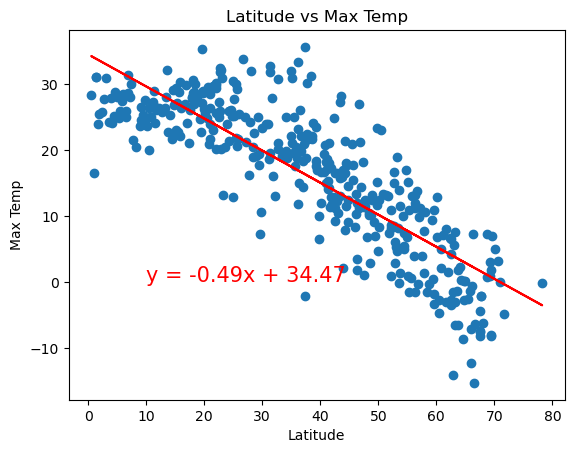

In [29]:
# Extract relevant data from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (10, 0), fontsize=15, color="red")

# Show plot
plt.show()

The r^2-value is: 0.5783411964767065


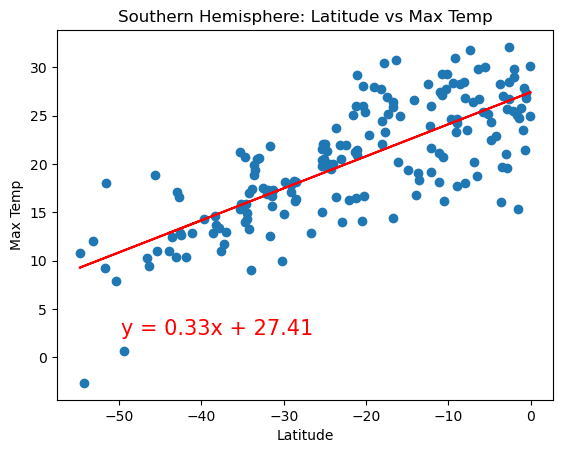

In [30]:
# Extract relevant data from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere: Latitude vs Max Temp")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0010199936008379387


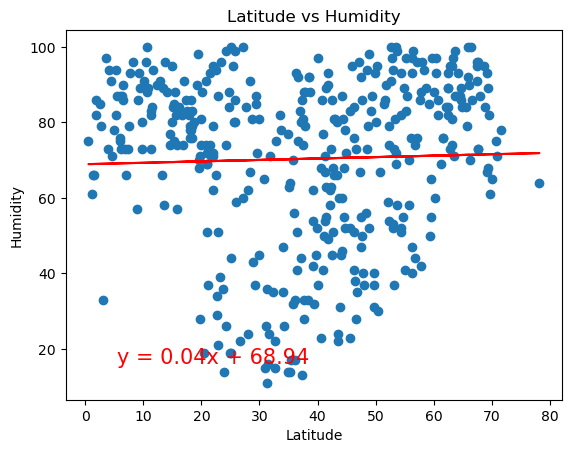

In [31]:
# Extract relevant data from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")

# Show plot
plt.show()

The r^2-value is: 0.020548758365847443


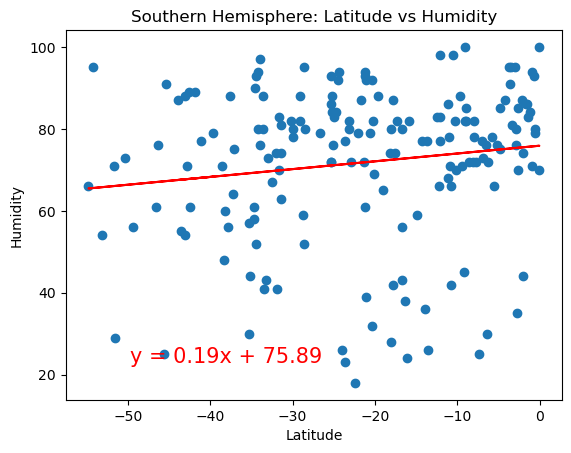

In [32]:
# Extract relevant data from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Latitude vs Humidity")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.012220285811736299


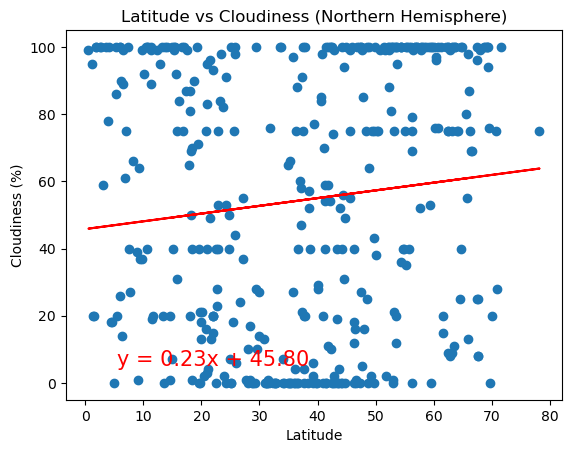

In [33]:
# Extract relevant data from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]  # Replace "Cloudiness" with the variable of interest

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")  # Replace with the appropriate y-axis label
plt.title("Latitude vs Cloudiness (Northern Hemisphere)")  # Adjust the title as needed

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")

# Show plot
plt.show()

The r^2-value is: 0.0006654084950607116


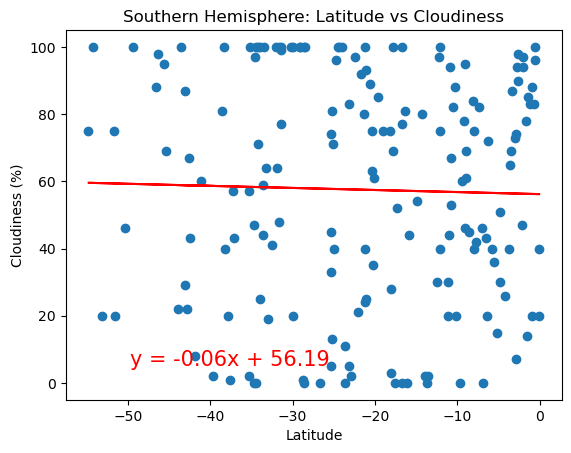

In [34]:
# Extract relevant data from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]  # Replace "Cloudiness" with the variable of interest

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")  # Replace with the appropriate y-axis label
plt.title("Southern Hemisphere: Latitude vs Cloudiness")  # Adjust the title as needed

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.03308662076226869


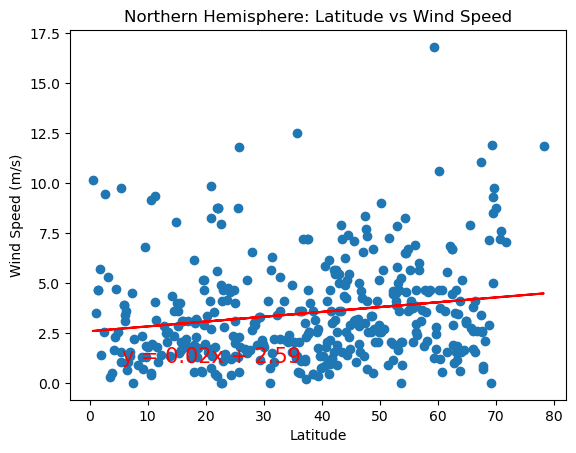

In [35]:
# Extract relevant data from the Northern Hemisphere DataFrame
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere: Latitude vs Wind Speed")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+1), fontsize=15, color="red")

# Show plot
plt.show()

The r^2-value is: 0.08596262313928628


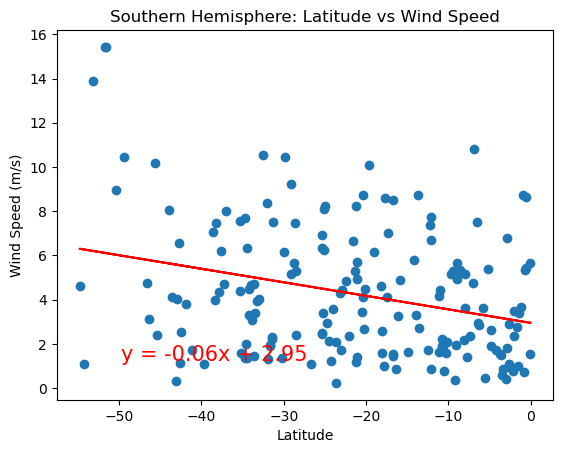

In [36]:
# Extract relevant data from the Southern Hemisphere DataFrame
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere: Latitude vs Wind Speed")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+1), fontsize=15, color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Discussion about the Linear Relationship:
#The linear regression analysis for wind speed vs. latitude in both hemispheres provides insights into the relationship between these variables.
#1-Northern Hemisphere:
#The R-squared value indicates how well the linear model explains the variance in wind speed based on latitude.
#A low R-squared value suggests a weak linear relationship, meaning latitude does not significantly affect wind speed in a straightforward, linear manner in the Northern Hemisphere.
#There may be other factors, such as geographical features, local weather patterns, or seasonal influences, that have a stronger impact on wind speed than latitude alone.
#2-Southern Hemisphere:
#Similar to the Northern Hemisphere, if the R-squared value is low, it suggests a weak or negligible linear relationship between latitude and wind speed.
#Given the Southern Hemisphere has large oceanic expanses, wind speed can be influenced by ocean currents, high-pressure systems, and storm patterns rather than latitude alone.
#The presence of only a slight negative or positive slope indicates that latitude might have a minor effect, but it's not sufficient to predict wind speed changes consistently across different latitudes.
#Latitude may have some influence on wind speed due to atmospheric circulation patterns, the linear relationship is weak. Wind speed is affected by a complex interplay of factors beyond latitude, such as pressure systems, altitude, and proximity to oceans or mountains, which are not captured by a simple linear model.